In [1]:
# Importing Libraries
from ampere_utils.plot import polar_plot, configure_polar_plot
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import datetime as dt

In [3]:
# Loading Data:
SuperDARN_file = r"C:\Users\Furio\Documents\University\Master's\Internship\Data\SuperDARN\2015\01\sd_vorticity_20150101_n.nc"
data = xr.load_dataset(SuperDARN_file)
data

<xarray.Dataset> Size: 8MB
Dimensions:    (bx_dim1: 718, hem_dim1: 718, mlt_grid_dim3: 718,
                mlt_grid_dim2: 24, mlt_grid_dim1: 40, syr_dim1: 718,
                sdy_dim1: 718, emo_dim1: 718, shr_dim1: 718, edy_dim1: 718,
                mlat_grid_dim3: 718, mlat_grid_dim2: 24, mlat_grid_dim1: 40,
                bz_dim1: 718, ehr_dim1: 718, npnt_dim1: 718, smt_dim1: 718,
                smo_dim1: 718, by_dim1: 718, latmin_dim1: 718, eyr_dim1: 718,
                vorticity_dim3: 718, vorticity_dim2: 24, vorticity_dim1: 40,
                emt_dim1: 718)
Dimensions without coordinates: bx_dim1, hem_dim1, mlt_grid_dim3,
                                mlt_grid_dim2, mlt_grid_dim1, syr_dim1,
                                sdy_dim1, emo_dim1, shr_dim1, edy_dim1,
                                mlat_grid_dim3, mlat_grid_dim2, mlat_grid_dim1,
                                bz_dim1, ehr_dim1, npnt_dim1, smt_dim1,
                                smo_dim1, by_dim1, latmin_dim1, eyr_dim1,
                                vorticity_dim3, vorticity_dim2, vorticity_dim1,
                                emt_dim1
Data variables: (12/19)
    bx         (bx_dim1) float32 3kB -1.31 -1.5 -2.18 ... -2.11 -1.68 -1.21
    hem        (hem_dim1) int16 1kB 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
    mlt_grid   (mlt_grid_dim3, mlt_grid_dim2, mlt_grid_dim1) float32 3MB 0.0 ...
    syr        (syr_dim1) int16 1kB 2015 2015 2015 2015 ... 2015 2015 2015 2015
    sdy        (sdy_dim1) int16 1kB 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
    emo        (emo_dim1) int16 1kB 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
    ...         ...
    smo        (smo_dim1) int16 1kB 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
    by         (by_dim1) float32 3kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    latmin     (latmin_dim1) float32 3kB 59.0 59.0 65.0 65.0 ... 61.0 61.0 61.0
    eyr        (eyr_dim1) int16 1kB 2015 2015 2015 2015 ... 2015 2015 2015 2015
    vorticity  (vorticity_dim3, vorticity_dim2, vorticity_dim1) float32 3MB 9...
    emt        (emt_dim1) int16 1kB 4 6 8 10 12 14 16 ... 46 48 50 52 54 56 58

In [17]:
data['vorticity'].shape

(718, 24, 40)

In [9]:
# Removing invalid values
north_vorticity = xr.where(data['vorticity'] >= 9990, np.nan, data['vorticity'])

In [15]:
# Time for SuperDARN is more difficult when using these files: 
print(data['syr'][0]) # Year
print(data['sdy'][0]) # Day
print(data['emo'][0]) # Month
print(data['shr'][0]) # Hour

<xarray.DataArray 'syr' ()> Size: 2B
array(2015, dtype=int16)
<xarray.DataArray 'sdy' ()> Size: 2B
array(1, dtype=int16)
<xarray.DataArray 'emo' ()> Size: 2B
array(1, dtype=int16)
<xarray.DataArray 'shr' ()> Size: 2B
array(0, dtype=int16)


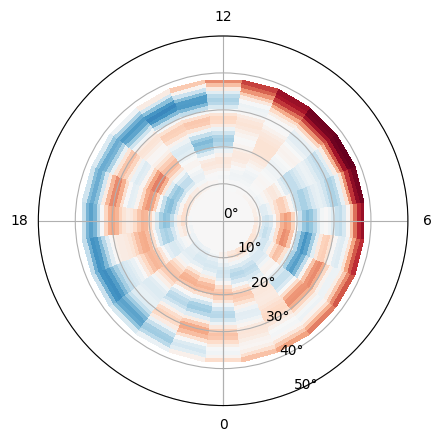

In [25]:
mlt = np.arange(24)
clat = np.arange(0,40)

j = north_vorticity[1,:,:]

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
polar_plot(mlt,clat,j.T, hemisphere = "north", ax = ax)